In [1]:
# Importação das bibliotecas essenciais para Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configurações de exibição (opcional, mas útil)
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# Assume que o arquivo se chama 'churn_data.csv' (ajuste o nome se for outro)
nome_do_arquivo = 'churn_data.csv'

# Tentativa 1: Com delimitador padrão (vírgula)
try:
    df = pd.read_csv(nome_do_arquivo)
    
    # Se carregou, mas só tem 1 coluna, precisamos mudar o delimitador.
    if df.shape[1] == 1:
        print("CSV carregou, mas só tem uma coluna. Tentando delimitador ';'.")
        
        # Tentativa 2: Com delimitador de ponto e vírgula (;)
        df = pd.read_csv(nome_do_arquivo, sep=';')

    print("Dataset carregado com sucesso! O DataFrame foi nomeado como 'df'.")

except FileNotFoundError:
    print(f"ERRO: O arquivo '{nome_do_arquivo}' não foi encontrado. Verifique o nome e a pasta.")

# Verificação final
if 'df' in locals():
    print(f"\nLinhas: {df.shape[0]}, Colunas: {df.shape[1]}")
    print("\nPrimeiras 5 linhas do DataFrame:")
    print(df.head())
    print("\nTipos de Dados e Nulos (Esperamos > 1 coluna):")
    df.info()

Dataset carregado com sucesso! O DataFrame foi nomeado como 'df'.

Linhas: 7043, Colunas: 33

Primeiras 5 linhas do DataFrame:
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude    Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33,964131  -118,272783    Male             No   
1   34.059281, -118.30742  34,059281  -118,307420  Female             No   
2  34.048013, -118.293953  34,048013  -118,293953  Female             No   
3  34.062125, -118.315709  34,062125  -118,315709  Female             No   
4  34.039224, -118.266293  34,039224  -118,26629

In [3]:
# Mostrar a forma (linhas e colunas)
print(f"Linhas (Clientes): {df.shape[0]}, Colunas (Variáveis): {df.shape[1]}")

# Verificar tipos de dados e valores faltantes (Missing Values)
print("\nInformações sobre Tipos de Dados e Valores Nulos:")
df.info()

# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas Descritivas:")
print(df.describe(include='all').T)

Linhas (Clientes): 7043, Colunas (Variáveis): 33

Informações sobre Tipos de Dados e Valores Nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         7043 non-null   object
 1   Count              7043 non-null   int64 
 2   Country            7043 non-null   object
 3   State              7043 non-null   object
 4   City               7043 non-null   object
 5   Zip Code           7043 non-null   int64 
 6   Lat Long           7043 non-null   object
 7   Latitude           7043 non-null   object
 8   Longitude          7043 non-null   object
 9   Gender             7043 non-null   object
 10  Senior Citizen     7043 non-null   object
 11  Partner            7043 non-null   object
 12  Dependents         7043 non-null   object
 13  Tenure Months      7043 non-null   int64 
 14  Phone Service      7043 non-null   o

Contagem de Churn (Clientes que Cancelaram ou Não):
Churn Value
0    5174
1    1869
Name: count, dtype: int64

Proporção (%):
Churn Value
0    73.463013
1    26.536987
Name: count, dtype: float64


C:\Users\saito\AppData\Local\Temp\ipykernel_2072\79113978.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn Value', data=df, palette='Set1')


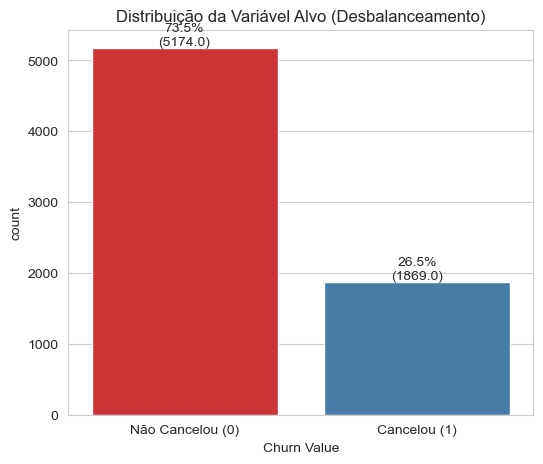

In [13]:
# 1. Contar e calcular proporção (Este código já estava correto)
churn_counts = df['Churn Value'].value_counts()
churn_ratio = churn_counts / df.shape[0] * 100

print("Contagem de Churn (Clientes que Cancelaram ou Não):")
print(churn_counts)
print("\nProporção (%):")
print(churn_ratio)

# 2. Visualização gráfica (Corrigida)
plt.figure(figsize=(6, 5))
# Garante que o eixo X use os valores 0 e 1 da coluna 'Churn Value'
ax = sns.countplot(x='Churn Value', data=df, palette='Set1')
plt.title('Distribuição da Variável Alvo (Desbalanceamento)')

# Define rótulos claros no eixo X
plt.xticks([0, 1], ['Não Cancelou (0)', 'Cancelou (1)']) 
plt.xlabel('Churn Value')

# Adiciona porcentagem em cima das barras para melhor visualização do desbalanceamento
total = len(df)
for p in ax.patches:
    percentage = f'{(100 * p.get_height() / total):.1f}%\n({p.get_height()})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [7]:
# 1. REMOÇÃO DE COLUNAS DESNECESSÁRIAS
# Removendo colunas redundantes ou com pouco valor preditivo direto:
df = df.drop(columns=[
    'CustomerID', # ID do cliente (não é preditivo)
    'Churn Label', # Redundante com Churn Value
    'Churn Reason', # Redundante / vazia para não-churn
    'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 
    'Latitude', 'Longitude' # Dados geográficos excessivos
])

# 2. TRATAMENTO DE 'TOTAL CHARGES' (O Problema do Tipo 'Object')
# O erro é causado por espaços vazios (" ") que não são reconhecidos como números.
# Primeiro, substituímos os espaços por NaN (Not a Number)
df['Total Charges'] = df['Total Charges'].replace(' ', np.nan) 

# Agora, fazemos a conversão para numérico (float).
# O parâmetro 'errors='coerce'' força a conversão, transformando valores problemáticos em NaN (se restarem)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# 3. TRATAMENTO DE VALORES FALTANTES (Nulos)
# Verificamos quantos Nulos temos após o tratamento de Total Charges:
print("Valores Nulos após a limpeza:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Temos poucos Nulos (11) em Total Charges. Vamos preencher com a Mediana (valor comum em Data Science):
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())


# 4. TRATAMENTO DE 'MONTHLY CHARGES'
# A vírgula (,) está impedindo a leitura correta. Vamos substituí-la por ponto (.) e converter para float:
df['Monthly Charges'] = df['Monthly Charges'].astype(str).str.replace(',', '.', regex=True)
df['Monthly Charges'] = pd.to_numeric(df['Monthly Charges'])

# Verificação final
print("\nVerificação após limpeza da Célula 5:")
df.info()

Valores Nulos após a limpeza:
Total Charges    6719
dtype: int64

Verificação após limpeza da Célula 5:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract        

In [8]:
# 1. IDENTIFICAR VARIÁVEIS CATEGÓRICAS (OBJECT)
# Seleciona todas as colunas que ainda são do tipo 'object'
colunas_categoricas = df.select_dtypes(include='object').columns

print(f"Colunas categóricas a serem codificadas: {list(colunas_categoricas)}")

# 2. APLICAR ONE-HOT ENCODING (Cria variáveis Dummies)
# O get_dummies transforma cada categoria em uma nova coluna binária (0 ou 1)
df_codificado = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# O argumento 'drop_first=True' é importante para evitar a multicolinearidade, 
# removendo a primeira categoria de cada nova variável dummy.

# 3. VERIFICAÇÃO FINAL
print("\nVerificação após a Codificação (Feature Engineering):")
print(f"Número final de colunas: {df_codificado.shape[1]}")
df_codificado.info()

Colunas categóricas a serem codificadas: ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

Verificação após a Codificação (Feature Engineering):
Número final de colunas: 33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tenure Months                           7043 non-null   int64  
 1   Monthly Charges                         7043 non-null   float64
 2   Total Charges                           7043 non-null   float64
 3   Churn Value                             7043 non-null   int64  
 4   Churn Score                             7043 non-null   int64  
 5   CLTV        

In [9]:
# 1. DEFINIR VARIÁVEIS X (Preditivas) e Y (Alvo)
# A variável alvo é 'Churn Value'. Removemos também 'Churn Score' e 'CLTV', 
# que são resultados de modelos de ML e não variáveis de entrada puras.
X = df_codificado.drop(columns=['Churn Value', 'Churn Score', 'CLTV']) 
Y = df_codificado['Churn Value']

print("Variáveis X (Preditivas):", X.shape)
print("Variável Y (Alvo):", Y.shape)

# 2. SEPARAR DADOS EM TREINO E TESTE
# Usaremos 80% para treino e 20% para teste. O 'random_state' garante que os resultados sejam repetíveis.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)
# 'stratify=Y' é crucial para manter a proporção de Churn (26.5%) nos conjuntos de treino e teste.

print("\nDivisão Treino/Teste:")
print(f"X_treino (80%): {X_treino.shape}")
print(f"X_teste (20%): {X_teste.shape}")

Variáveis X (Preditivas): (7043, 30)
Variável Y (Alvo): (7043,)

Divisão Treino/Teste:
X_treino (80%): (5634, 30)
X_teste (20%): (1409, 30)


In [10]:
from sklearn.linear_model import LogisticRegression

# 1. INICIALIZAR E TREINAR O MODELO
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)
print("Treinando o modelo...")
modelo_logistico.fit(X_treino, Y_treino)
print("Treinamento concluído!")

# 2. FAZER PREVISÕES NO CONJUNTO DE TESTE
Y_previsao = modelo_logistico.predict(X_teste)

# 3. AVALIAÇÃO DO MODELO
print("\n--- Métricas de Avaliação do Modelo de Regressão Logística ---")

# Acurácia (Accuracy)
acuracia = accuracy_score(Y_teste, Y_previsao)
print(f"Acurácia Geral: {acuracia:.4f}")

# Relatório de Classificação
print("\nRelatório de Classificação (Precision, Recall, F1-score):")
print(classification_report(Y_teste, Y_previsao))

Treinando o modelo...
Treinamento concluído!

--- Métricas de Avaliação do Modelo de Regressão Logística ---
Acurácia Geral: 0.8013

Relatório de Classificação (Precision, Recall, F1-score):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.73      1409
weighted avg       0.79      0.80      0.80      1409



C:\Users\saito\miniconda3\envs\portifolio\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # Usaremos um Pipeline para garantir que o escalonamento seja aplicado APENAS aos dados de TREINO

# 1. DEFINIR O PIPELINE
# Um Pipeline é um encapsulamento de passos que garante a correta aplicação do pré-processamento (Scaler)
# e do modelo (Regressão Logística).
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Primeiro passo: Escalar os dados
    ('logreg', LogisticRegression(max_iter=5000, random_state=42)) # Segundo passo: Treinar o modelo (aumentamos max_iter para 5000)
])

# 2. TREINAR O MODELO (O pipeline se encarrega do fit e do transform)
print("Treinando o modelo Otimizado (com Escalonamento)...")
pipeline.fit(X_treino, Y_treino)
print("Treinamento concluído!")

# 3. FAZER PREVISÕES NO CONJUNTO DE TESTE
# O pipeline aplica o escalonamento aprendido no treino antes de prever
Y_previsao_otimizada = pipeline.predict(X_teste)

# 4. AVALIAÇÃO DO MODELO OTIMIZADO
print("\n--- Métricas de Avaliação do Modelo Otimizado (com Escalonamento) ---")

# Acurácia (Accuracy)
acuracia_otimizada = accuracy_score(Y_teste, Y_previsao_otimizada)
print(f"Acurácia Geral Otimizada: {acuracia_otimizada:.4f}")

# Relatório de Classificação
print("\nRelatório de Classificação (Precision, Recall, F1-score):")
print(classification_report(Y_teste, Y_previsao_otimizada))

Treinando o modelo Otimizado (com Escalonamento)...
Treinamento concluído!

--- Métricas de Avaliação do Modelo Otimizado (com Escalonamento) ---
Acurácia Geral Otimizada: 0.8020

Relatório de Classificação (Precision, Recall, F1-score):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



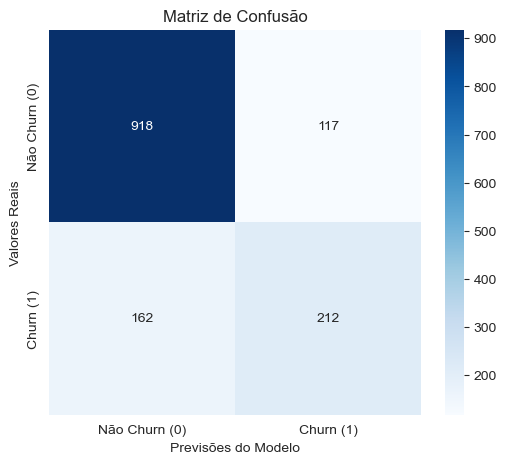

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Gera a matriz de confusão usando as previsões otimizadas
cm = confusion_matrix(Y_teste, Y_previsao_otimizada)

plt.figure(figsize=(6, 5))
# Cria o mapa de calor da matriz
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Não Churn (0)', 'Churn (1)'], 
            yticklabels=['Não Churn (0)', 'Churn (1)'])
plt.ylabel('Valores Reais')
plt.xlabel('Previsões do Modelo')
plt.title('Matriz de Confusão')
plt.show()

# Se você quiser adicionar um gráfico de Importância de Features (Para ver o que mais influencia o Churn):
# (Atenção: A Regressão Logística usa coeficientes, não Feature Importance, mas é bom tentar extrair a importância)
# Este é um código avançado. Se quiser simplificar, ignore esta parte.

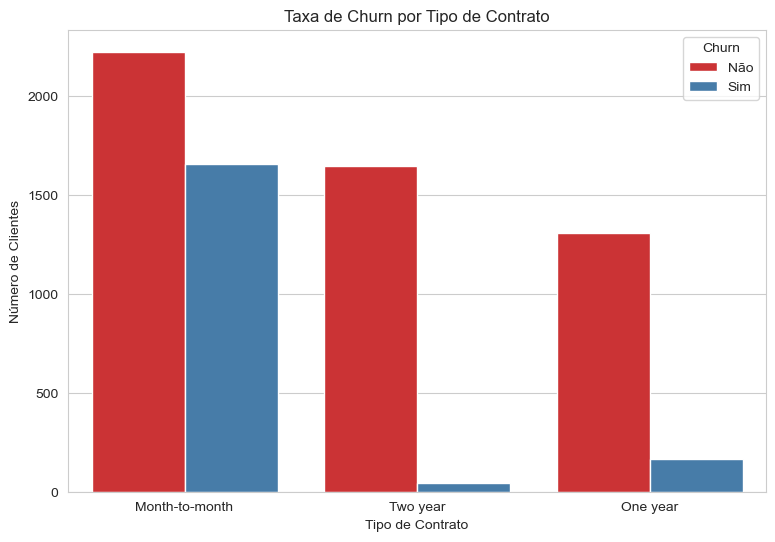

In [14]:
# Gráfico de Churn por Tipo de Contrato
plt.figure(figsize=(9, 6))
# Usamos o DataFrame original 'df' antes da codificação, pois as colunas de texto são mais legíveis
sns.countplot(x='Contract', hue='Churn Value', data=df, palette='Set1')
plt.title('Taxa de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

C:\Users\saito\AppData\Local\Temp\ipykernel_2072\3526413582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Value', y='Tenure Months', data=df, palette='Set2')


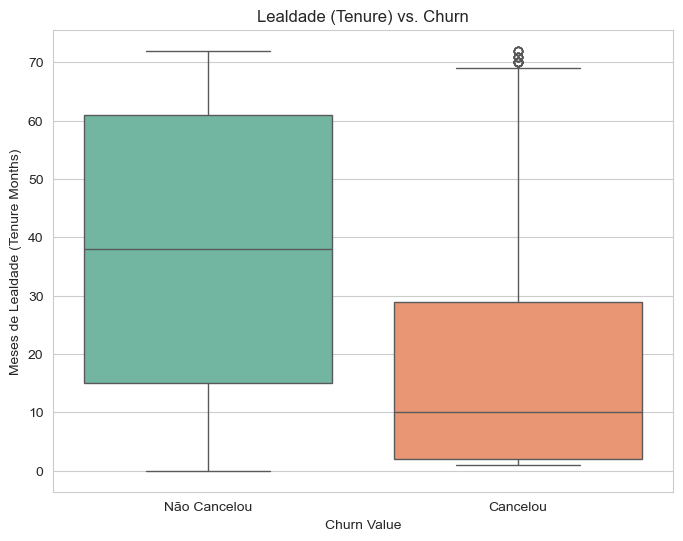

In [15]:
# Gráfico de Meses de Lealdade (Tenure Months) vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn Value', y='Tenure Months', data=df, palette='Set2')
plt.title('Lealdade (Tenure) vs. Churn')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.xlabel('Churn Value')
plt.ylabel('Meses de Lealdade (Tenure Months)')
plt.show()